#AGRUPACIÓN DE DATOS COMUNES EMPLEANDO K-MEANS

La siguiente prueba consiste en tratar de buscar agrupamientos de productos comunes a partir del dataset "Wholesale Customers Data Set", en el que se detallan diferentes compras de algunos productos.

In [315]:
#IMPORTACIÓN DE LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing #para la normalización
from sklearn.cluster import KMeans #para el entreno y predicción con kmeans
from sklearn.decomposition import PCA

In [316]:
#DESCARGA DE DATOS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
data = pd.read_csv(url)
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [317]:
data.shape

(440, 8)

In [318]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [319]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [320]:
#eliminamos columnas 'Channel' y 'Region', que no van a emplearse
data = data.drop(['Channel', 'Region'], axis = 1)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [321]:
#indices para extraer una muestra de 3 elementos
indices_muestra = np.random.randint(0, high=len(data),size=3).tolist()
indices_muestra

[413, 148, 183]

In [322]:
#dataframe de muestra de 3 elementos
muestra = data.iloc[indices_muestra]
muestra

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
413,4983,4859,6633,17866,912,2435
148,5924,584,542,4052,283,434
183,36847,43950,20170,36534,239,47943


In [323]:
data = data.drop(index = indices_muestra, axis = 0)
data.shape

(437, 6)

In [324]:
#Escalado de datos de entrenamiento
data_escalado = preprocessing.Normalizer().fit_transform(data)
data_escalado = pd.DataFrame(data_escalado)
data_escalado

,0,1,2,3,4,5
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
...,...,...,...,...,...,...
432,0.776890,0.315197,0.419191,0.343549,0.004760,0.057646
433,0.990872,0.036146,0.019298,0.113919,0.002349,0.059258
434,0.364462,0.388465,0.758545,0.010961,0.372237,0.046827
435,0.937737,0.180530,0.203404,0.094594,0.015310,0.193653


In [325]:
#Escalado de datos de muestra
muestra_escalado = preprocessing.Normalizer().fit_transform(muestra)
muestra_escalado = pd.DataFrame(muestra_escalado)
muestra_escalado

,0,1,2,3,4,5
0,0.243612,0.237550,0.324279,0.873445,0.044586,0.119044
1,0.818247,0.080664,0.074863,0.559678,0.039089,0.059946
2,0.430394,0.513361,0.235597,0.426738,0.002792,0.560002


In [326]:
#Equivalencia de columnas
equivalencias = dict()
for i in range(len(data.columns)):
  equivalencias[str(data.columns[i])] = str(data_escalado.columns[i])
equivalencias

{'Delicassen': '5',
 'Detergents_Paper': '4',
 'Fresh': '0',
 'Frozen': '3',
 'Grocery': '2',
 'Milk': '1'}

In [327]:
#Primero deberemos determinar el valor óptimo de K
inercia = []
for i in range(1,20):
  model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
  model.fit(data_escalado)
  inercia.append(model.inertia_)
inercia

[132.26291044264494,
 56.72727639747204,
 45.2933232152529,
 36.231619124586004,
 30.00670538520523,
 26.52242398556844,
 23.81390836041045,
 21.967706500817393,
 20.657820356610422,
 19.600607792488976,
 18.473341865522247,
 17.500304777587697,
 16.752209773253675,
 15.83654416761296,
 15.324102875842001,
 14.524801108072374,
 14.075706471617373,
 13.572044694983282,
 12.866474412410081]

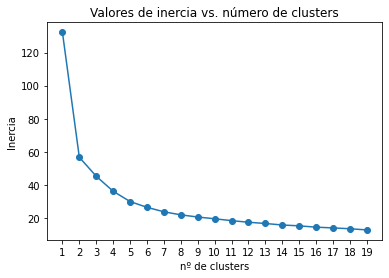

In [337]:
plt.plot(range(1,20), inercia, 'o-')
plt.title('Valores de inercia vs. número de clusters')
plt.xlabel('nº de clusters')
plt.xticks(range(1,20))
plt.ylabel('Inercia')
plt.show()

In [329]:
#Por el método del codo, se determina que el valor de K óptimo sería 6.
#Entrenamos el modelo para K = 6
model = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300).fit(data_escalado)

In [330]:
#Obtenemos los centroides y las etiquetas del modelo entrenado
centroides, etiquetas = model.cluster_centers_, model.labels_
centroides, etiquetas

(array([[0.70416878, 0.33372401, 0.5134971 , 0.09440153, 0.17850685,
         0.10100062],
        [0.95452165, 0.12626136, 0.16517109, 0.11906859, 0.03090797,
         0.05998253],
        [0.43083569, 0.18225196, 0.34567302, 0.74822011, 0.05388876,
         0.0804092 ],
        [0.16494061, 0.42169156, 0.77848814, 0.07667063, 0.32901397,
         0.07048522],
        [0.81275605, 0.20613074, 0.20701648, 0.446546  , 0.03736675,
         0.08358095],
        [0.28752203, 0.71349409, 0.46791909, 0.16604234, 0.1202695 ,
         0.18361173]]),
 array([0, 5, 5, 4, 1, 0, 0, 0, 0, 3, 3, 1, 0, 0, 0, 1, 3, 5, 0, 0, 1, 4,
        1, 5, 0, 0, 1, 1, 3, 1, 0, 5, 1, 1, 5, 3, 1, 0, 3, 1, 4, 1, 0, 3,
        0, 5, 3, 5, 0, 3, 4, 3, 1, 3, 1, 0, 3, 3, 1, 0, 0, 3, 0, 3, 4, 3,
        3, 0, 5, 1, 4, 0, 2, 4, 0, 1, 2, 3, 1, 5, 1, 3, 0, 1, 0, 3, 5, 1,
        2, 1, 1, 4, 3, 2, 5, 3, 3, 2, 2, 4, 0, 3, 3, 1, 1, 1, 3, 3, 5, 3,
        1, 0, 4, 1, 1, 1, 1, 0, 1, 4, 1, 4, 1, 0, 1, 1, 4, 0, 5, 1, 4, 1,
        

In [331]:
#Determinamos, con los datos de muestra, a qué cluster pertenecerían
muestra_prediccion = model.predict(muestra_escalado)
muestra_prediccion

array([2, 4, 5], dtype=int32)

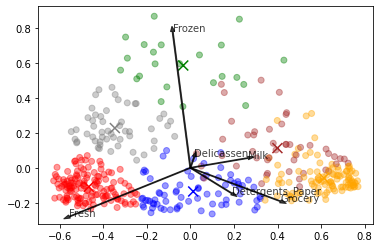

In [332]:
#VISUALIZAMOS LOS RESULTADOS, REDUCIENDO SU DIMENSIONALIDAD PARA PODER INTERPRETARLOS

#creamos el modelo de transformación entrenado con los datos
model_pca = PCA(n_components=2).fit(data_escalado)

#transformamos los datos y centroides 
data_pca = model_pca.transform(data_escalado)
centroides_pca = model_pca.transform(centroides)

#definimos un color para cada cluster y se lo asignamos a cada valor de data
colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown']
colores_cluster = [colores[etiquetas[i]] for i in range(len(data_pca))]

#se inserta en el gráfico los componentes de data y los centroides
plt.scatter(data_pca[:,0], data_pca[:, 1], c=colores_cluster, marker='o', alpha=0.4)
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker='x', s=100, linewidths=3, c=colores)

#se determinan los vectores de los componentes
xvector = model_pca.components_[0] * max(data_pca[:,0]) 
yvector = model_pca.components_[1] * max(data_pca[:,1])

#Se representan los nombres de los clústeres con cada uno de los vectores
for i in range(len(data.columns)):
  plt.arrow(0,0, xvector[i], yvector[i], color='black', width=0.005, head_width=0.02, alpha=0.75)
  plt.text(xvector[i], yvector[i], list(data.columns)[i], color='black', alpha=0.75)

plt.show()

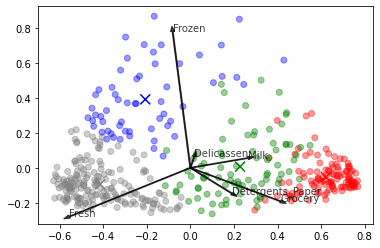

In [333]:
#A la vista de los resultados, parece quepodrían agruparse en 4 grupos (fresco, congelado, fresco+congelado, y el resto).
#Se prueba a continuación el resultado con 4 clusters

#entrenamiento del modelo
model = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300).fit(data_escalado)

#obtención de centroides
centroides, etiquetas = model.cluster_centers_, model.labels_
centroides, etiquetas

#predicción de la muestra
muestra_prediccion = model.predict(muestra_escalado)
muestra_prediccion

#visualización
#creamos el modelo de transformación entrenado con los datos
model_pca = PCA(n_components=2).fit(data_escalado)

#transformamos los datos y centroides 
data_pca = model_pca.transform(data_escalado)
centroides_pca = model_pca.transform(centroides)

#definimos un color para cada cluster y se lo asignamos a cada valor de data
colores = ['blue', 'red', 'green', 'gray']
colores_cluster = [colores[etiquetas[i]] for i in range(len(data_pca))]

#se inserta en el gráfico los componentes de data y los centroides
plt.scatter(data_pca[:,0], data_pca[:, 1], c=colores_cluster, marker='o', alpha=0.4)
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker='x', s=100, linewidths=3, c=colores)

#se determinan los vectores de los componentes
xvector = model_pca.components_[0] * max(data_pca[:,0]) 
yvector = model_pca.components_[1] * max(data_pca[:,1])

#Se representan los nombres de los clústeres con cada uno de los vectores
for i in range(len(data.columns)):
  plt.arrow(0,0, xvector[i], yvector[i], color='black', width=0.005, head_width=0.02, alpha=0.75)
  plt.text(xvector[i], yvector[i], list(data.columns)[i], color='black', alpha=0.75)

plt.show()

In [ ]:
#El conjunto azul parece que compra predominantemente congelado
#El conjunto gris parece que compra predominantemente fresco
#Los conjuntos verde y rojo, comprarían todo el resto
#Apunta a que podrían generarse 3 clústers principales (fresco, congelado, resto)

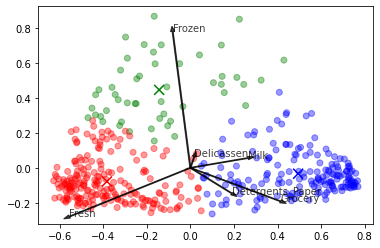

In [334]:
#Se prueba a continuación el resultado con 3 clusters

#entrenamiento del modelo
model = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300).fit(data_escalado)

#obtención de centroides
centroides, etiquetas = model.cluster_centers_, model.labels_
centroides, etiquetas

#predicción de la muestra
muestra_prediccion = model.predict(muestra_escalado)
muestra_prediccion

#visualización
#creamos el modelo de transformación entrenado con los datos
model_pca = PCA(n_components=2).fit(data_escalado)

#transformamos los datos y centroides 
data_pca = model_pca.transform(data_escalado)
centroides_pca = model_pca.transform(centroides)

#definimos un color para cada cluster y se lo asignamos a cada valor de data
colores = ['blue', 'red', 'green']
colores_cluster = [colores[etiquetas[i]] for i in range(len(data_pca))]

#se inserta en el gráfico los componentes de data y los centroides
plt.scatter(data_pca[:,0], data_pca[:, 1], c=colores_cluster, marker='o', alpha=0.4)
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker='x', s=100, linewidths=3, c=colores)

#se determinan los vectores de los componentes
xvector = model_pca.components_[0] * max(data_pca[:,0]) 
yvector = model_pca.components_[1] * max(data_pca[:,1])

#Se representan los nombres de los clústeres con cada uno de los vectores
for i in range(len(data.columns)):
  plt.arrow(0,0, xvector[i], yvector[i], color='black', width=0.005, head_width=0.02, alpha=0.75)
  plt.text(xvector[i], yvector[i], list(data.columns)[i], color='black', alpha=0.75)

plt.show()

#CONCLUSIÓN

Tras haber probado con 6, 4 y 3 clústeres diferentes, se puede determinar que existen los grupos de persona que compran predominantemente fresco, los que compran predominantemente congelado y el otro grupo que sería el resto.

Esto concluye que sería rentable poder disponer Delicatessen, Milk, Detergents, Paper y Grocery de manera cercana, ya que lo más probable es que compren de eso también.

Por otra parte, poner esos productos junto al fresco o congelado no sería eficiente, ya que lo más probable es que no compren dichos productos.